In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import plotly.express as px
from math import pi

In [ ]:
# Define the file path in Google Drive
file_path = f'newspapers_master_file_20250629.csv'

In [ ]:
combined_df = pd.read_csv(file_path)

In [ ]:
combined_df

,newspaper,title,content,mapped_title_sentiment,new_content_sentiment
0,Tribune,Year's third polio drive kicks off,US\nGovt aims to vaccinate over 45m children U...,POSITIVE,POSITIVE
1,Tribune,Two hostages rescued in Rajanpur,"IL\nRajanpur police rescued two hostages, who ...",POSITIVE,NEUTRAL
2,Tribune,"Mother, children of Pakistani origin killed in...",US\n.\nA Pakistani mother and her three childr...,NEUTRAL,NEGATIVE
3,Tribune,Bangladesh court begins first trial of Hasina-...,AZ\n.\nBangladesh began the first trial on Sun...,NEUTRAL,NEUTRAL
4,Tribune,PM grieves over Khuzdar martyrs,US\nPM states attack on children in school bus...,NEGATIVE,NEGATIVE
...,...,...,...,...,...
5139,The News,NA okays Rs4.814tr grants dismissing oppositio...,ISLAMABAD: The National Assembly has approved ...,NEUTRAL,NEUTRAL
5140,The News,Lt Gen Asim Malik debunks Ajit Doval’s allegat...,ISLAMABAD: Pakistan’s National Security Advise...,NEUTRAL,NEGATIVE
5141,The News,Arrest of taxpayers without sales tax assessme...,ISLAMABAD: The Supreme Court (SC) has declared...,NEGATIVE,NEUTRAL
5142,The News,Imran opposes surplus budget under IMF condition,PESHAWAR: The Khyber Pakhtunkhwa Assembly pass...,NEUTRAL,NEUTRAL


In [ ]:
combined_df = combined_df.rename(columns={
    'mapped_title_sentiment': 'Title Sentiment',
    'new_content_sentiment': 'Content Sentiment'
})


In [ ]:
combined_df

,newspaper,title,content,Title Sentiment,Content Sentiment
0,Tribune,Year's third polio drive kicks off,US\nGovt aims to vaccinate over 45m children U...,POSITIVE,POSITIVE
1,Tribune,Two hostages rescued in Rajanpur,"IL\nRajanpur police rescued two hostages, who ...",POSITIVE,NEUTRAL
2,Tribune,"Mother, children of Pakistani origin killed in...",US\n.\nA Pakistani mother and her three childr...,NEUTRAL,NEGATIVE
3,Tribune,Bangladesh court begins first trial of Hasina-...,AZ\n.\nBangladesh began the first trial on Sun...,NEUTRAL,NEUTRAL
4,Tribune,PM grieves over Khuzdar martyrs,US\nPM states attack on children in school bus...,NEGATIVE,NEGATIVE
...,...,...,...,...,...
5139,The News,NA okays Rs4.814tr grants dismissing oppositio...,ISLAMABAD: The National Assembly has approved ...,NEUTRAL,NEUTRAL
5140,The News,Lt Gen Asim Malik debunks Ajit Doval’s allegat...,ISLAMABAD: Pakistan’s National Security Advise...,NEUTRAL,NEGATIVE
5141,The News,Arrest of taxpayers without sales tax assessme...,ISLAMABAD: The Supreme Court (SC) has declared...,NEGATIVE,NEUTRAL
5142,The News,Imran opposes surplus budget under IMF condition,PESHAWAR: The Khyber Pakhtunkhwa Assembly pass...,NEUTRAL,NEUTRAL


In [ ]:
df = combined_df

In [ ]:
df.head()

,newspaper,title,content,Title Sentiment,Content Sentiment
0,Tribune,Year's third polio drive kicks off,US\nGovt aims to vaccinate over 45m children U...,POSITIVE,POSITIVE
1,Tribune,Two hostages rescued in Rajanpur,"IL\nRajanpur police rescued two hostages, who ...",POSITIVE,NEUTRAL
2,Tribune,"Mother, children of Pakistani origin killed in...",US\n.\nA Pakistani mother and her three childr...,NEUTRAL,NEGATIVE
3,Tribune,Bangladesh court begins first trial of Hasina-...,AZ\n.\nBangladesh began the first trial on Sun...,NEUTRAL,NEUTRAL
4,Tribune,PM grieves over Khuzdar martyrs,US\nPM states attack on children in school bus...,NEGATIVE,NEGATIVE


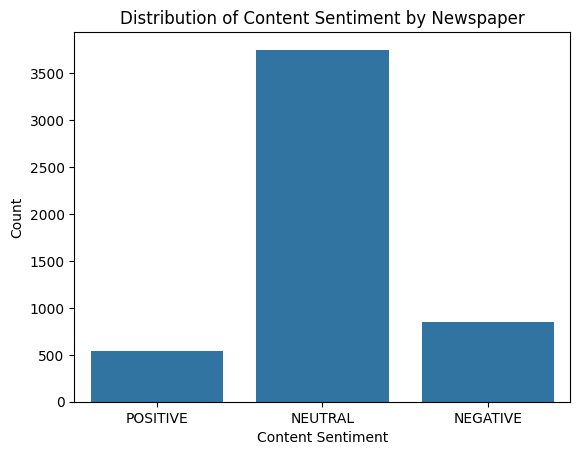

In [ ]:
sns.countplot(data=df, x='Content Sentiment')
plt.title('Distribution of Content Sentiment by Newspaper')
plt.xlabel('Content Sentiment')
plt.ylabel('Count')
plt.show()


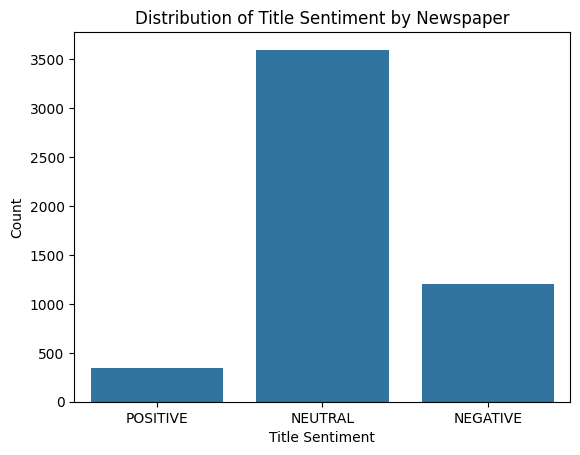

In [ ]:
sns.countplot(data=df, x='Title Sentiment')
plt.title('Distribution of Title Sentiment by Newspaper')
plt.xlabel('Title Sentiment')
plt.ylabel('Count')
plt.show()


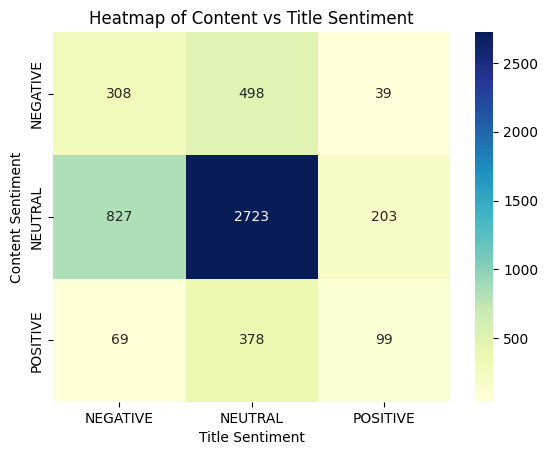

In [ ]:
cross_tab = pd.crosstab(df['Content Sentiment'], df['Title Sentiment'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Content vs Title Sentiment')
plt.xlabel('Title Sentiment')
plt.ylabel('Content Sentiment')
plt.show()


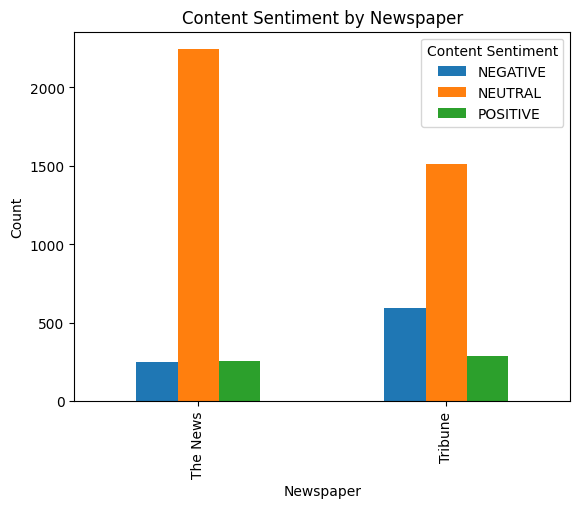

In [ ]:
sentiment_counts = df.groupby(['newspaper', 'Content Sentiment']).size().unstack()
sentiment_counts.plot(kind='bar', stacked=False)
plt.title('Content Sentiment by Newspaper')
plt.ylabel('Count')
plt.xlabel('Newspaper')
plt.show()


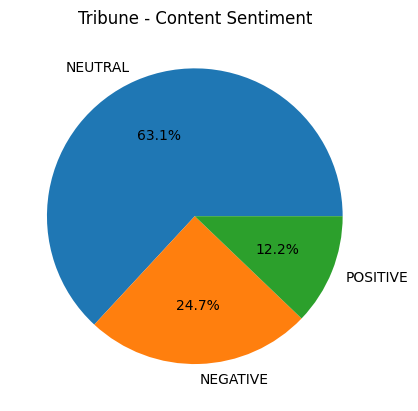

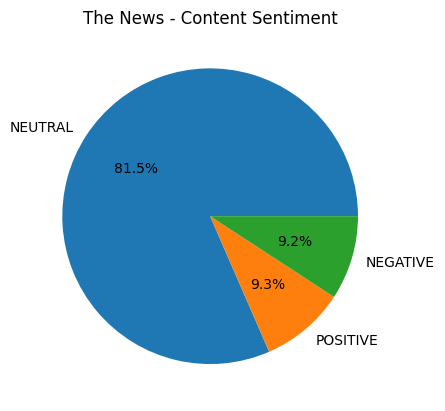

In [ ]:
for paper in df['newspaper'].unique():
    df_paper = df[df['newspaper'] == paper]
    sentiment_counts = df_paper['Content Sentiment'].value_counts()
    sentiment_counts.plot(kind='pie', autopct='%1.1f%%', title=f'{paper} - Content Sentiment')
    plt.ylabel('')
    plt.show()


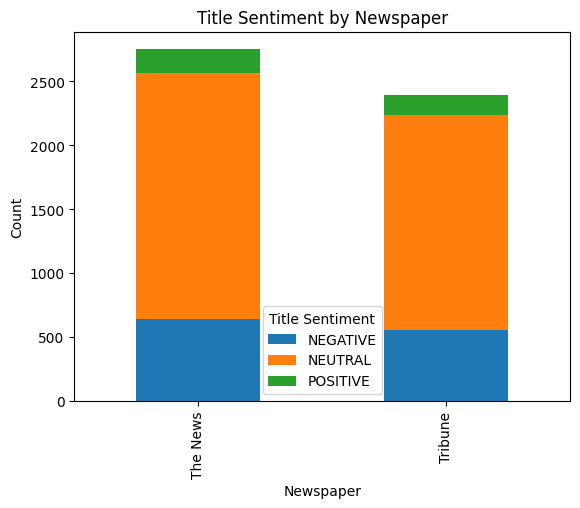

In [ ]:
title_sentiment_counts = df.groupby(['newspaper', 'Title Sentiment']).size().unstack()
title_sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Title Sentiment by Newspaper')
plt.ylabel('Count')
plt.xlabel('Newspaper')
plt.show()


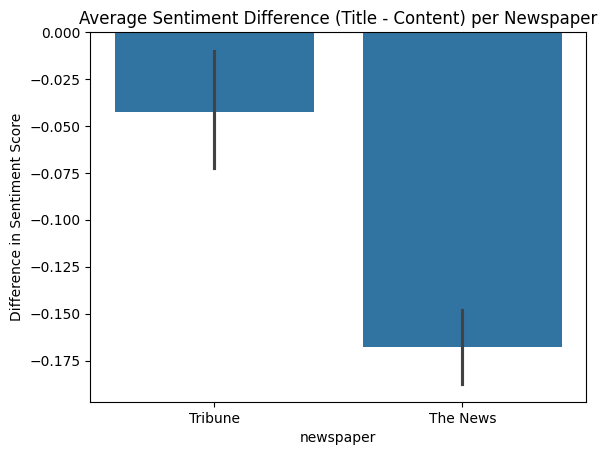

In [ ]:
def sentiment_score(sentiment):
    return {'NEGATIVE': -1, 'NEUTRAL': 0, 'POSITIVE': 1}.get(sentiment, 0)

df['sentiment_diff'] = df.apply(lambda row: sentiment_score(row['Title Sentiment']) - sentiment_score(row['Content Sentiment']), axis=1)

sns.barplot(x='newspaper', y='sentiment_diff', data=df)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Average Sentiment Difference (Title - Content) per Newspaper')
plt.ylabel('Difference in Sentiment Score')
plt.show()


In [ ]:
# Table 1: Distribution of new_content_sentiment per newspaper
content_sentiment_dist = df.groupby(['newspaper', 'Content Sentiment']).size().unstack(fill_value=0)
print("Content Sentiment Distribution:\n", content_sentiment_dist)

# Table 2: Distribution of mapped_title_sentiment per newspaper
title_sentiment_dist = df.groupby(['newspaper', 'Title Sentiment']).size().unstack(fill_value=0)
print("\nTitle Sentiment Distribution:\n", title_sentiment_dist)


Content Sentiment Distribution:
 Content Sentiment  NEGATIVE  NEUTRAL  POSITIVE
newspaper                                     
The News                253     2243       255
Tribune                 592     1510       291

Title Sentiment Distribution:
 Title Sentiment  NEGATIVE  NEUTRAL  POSITIVE
newspaper                                   
The News              645     1921       185
Tribune               559     1678       156


In [ ]:
combined_df = df

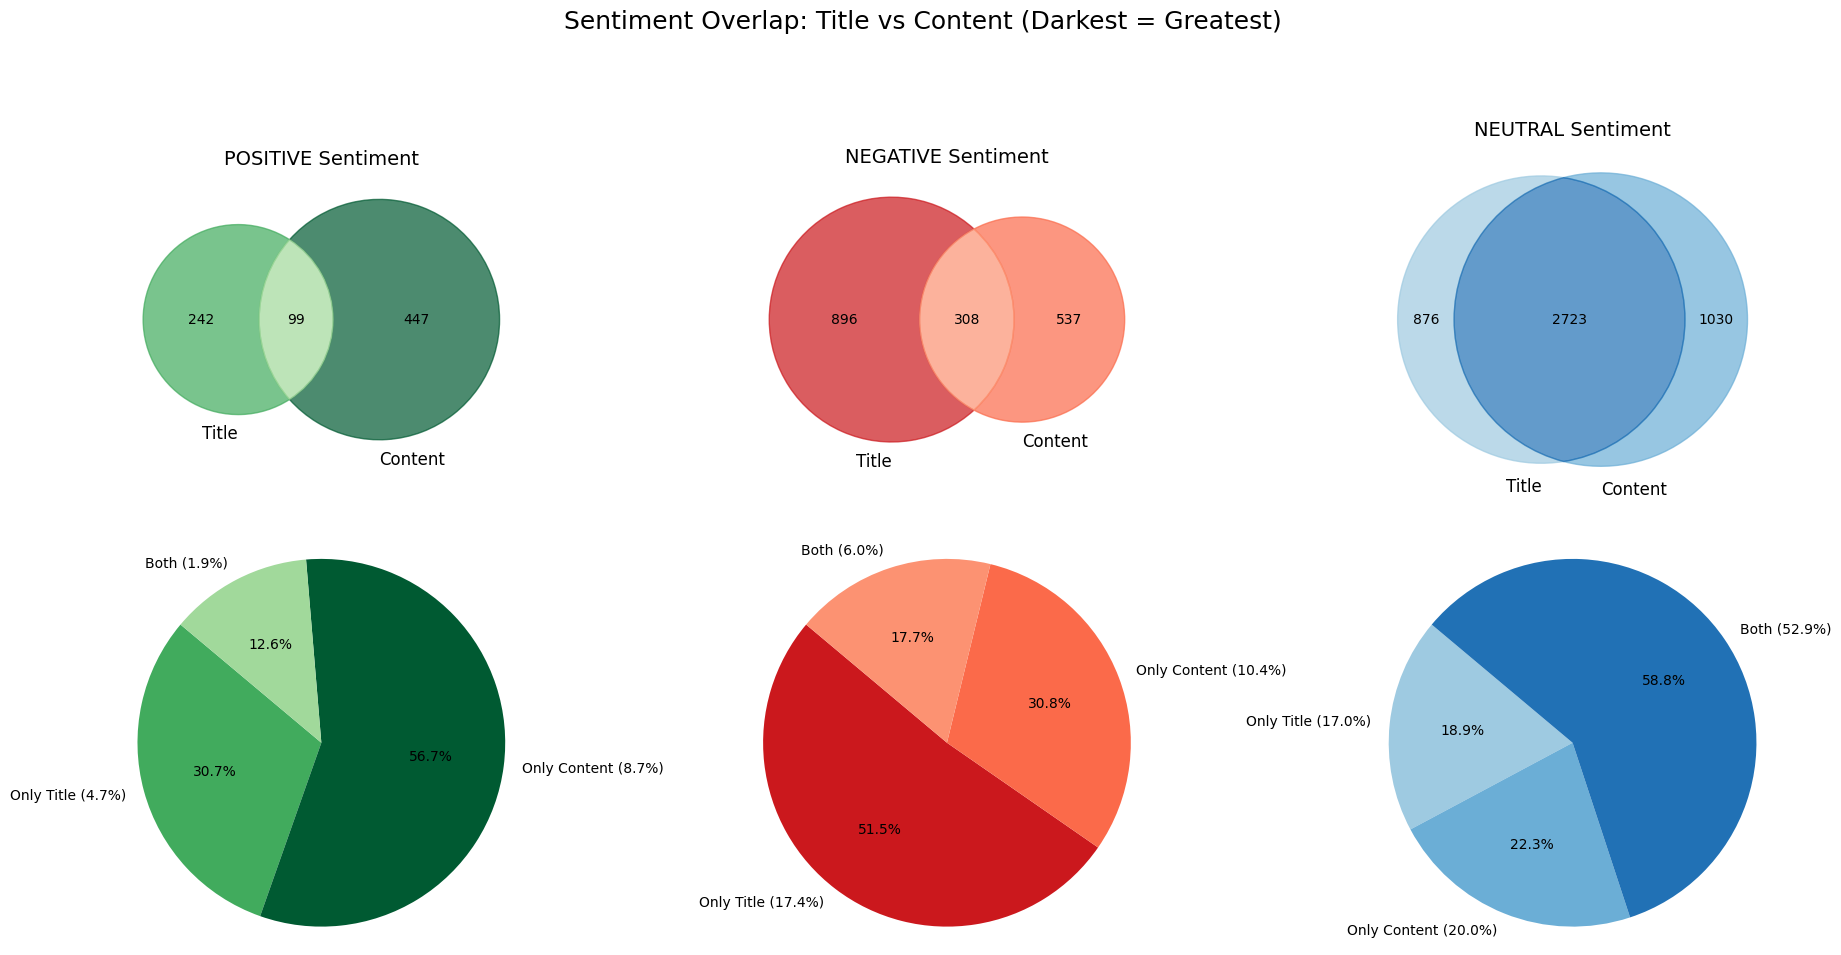

In [ ]:
# Clean and split title sentiment
combined_df['title_sentiment_cleaned'] = combined_df['Title Sentiment'].astype(str).str.replace(r"[\[\]']", "", regex=True)
combined_df['title_sentiment_list'] = combined_df['title_sentiment_cleaned'].str.split(',')
combined_df['title_sentiment_list'] = combined_df['title_sentiment_list'].apply(lambda x: [i.strip().upper() for i in x])

# Define sentiment categories and color shades from light to dark
sentiments = ['POSITIVE', 'NEGATIVE', 'NEUTRAL']
colors_dict = {
    'POSITIVE': ['#A1D99B', '#41AB5D', '#005A32'],  # green shades
    'NEGATIVE': ['#FC9272', '#FB6A4A', '#CB181D'],  # red shades
    'NEUTRAL':  ['#9ECAE1', '#6BAED6', '#2171B5']   # blue shades
}

# Create subplots: 2 rows (Venn + Pie), 3 columns (POS, NEG, NEU)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
total = len(combined_df)

for i, sentiment in enumerate(sentiments):
    # Get subsets
    title_set = set(combined_df[combined_df['title_sentiment_list'].apply(lambda x: sentiment in x)].index)
    content_set = set(combined_df[combined_df['Content Sentiment'] == sentiment].index)

    only_title = len(title_set - content_set)
    only_content = len(content_set - title_set)
    both = len(title_set & content_set)

    sizes = [only_title, only_content, both]
    labels = ['Only Title', 'Only Content', 'Both']

    # Determine color order based on size (smallest = lightest, largest = darkest)
    sorted_indices = sorted(range(3), key=lambda x: sizes[x])
    colors = [None] * 3
    for rank, idx in enumerate(sorted_indices):  # assign colors based on rank
        colors[idx] = colors_dict[sentiment][rank]

    # Venn Diagram (color region patches explicitly)
    v = venn2([title_set, content_set], set_labels=('Title', 'Content'), ax=axes[0, i])
    venn_labels = ['10', '01', '11']  # only_title, only_content, both
    for idx, label in enumerate(venn_labels):
        if v.get_patch_by_id(label):
            v.get_patch_by_id(label).set_color(colors[idx])
            v.get_patch_by_id(label).set_alpha(0.7)
        if v.get_label_by_id(label):
            v.get_label_by_id(label).set_text(str(sizes[idx]))

    axes[0, i].set_title(f'{sentiment} Sentiment', fontsize=14)

    # Pie Chart
    axes[1, i].pie(sizes,
                   labels=[f'{l} ({s/total:.1%})' for l, s in zip(labels, sizes)],
                   colors=colors,
                   autopct='%1.1f%%', startangle=140)
    axes[1, i].axis('equal')

plt.suptitle("Sentiment Overlap: Title vs Content (Darkest = Greatest)", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


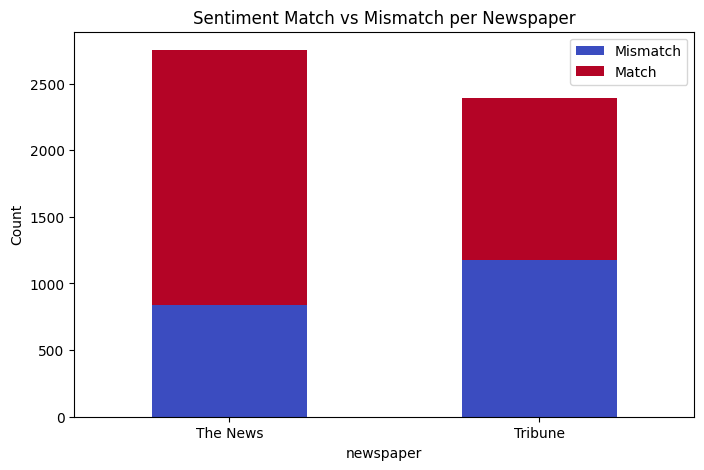

In [ ]:
combined_df['sentiment_match'] = combined_df['Title Sentiment'] == combined_df['Content Sentiment']

match_counts = combined_df.groupby(['newspaper', 'sentiment_match']).size().unstack(fill_value=0)
match_counts.columns = ['Mismatch', 'Match']
match_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Sentiment Match vs Mismatch per Newspaper')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


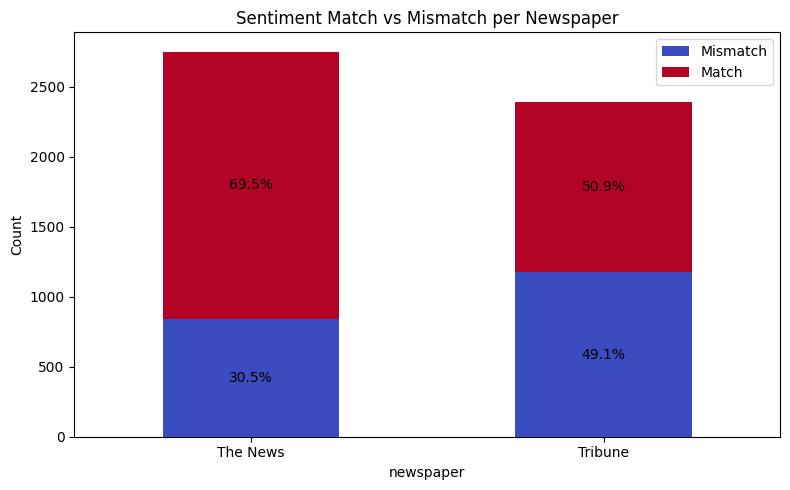

In [ ]:
# Create sentiment match column
combined_df['sentiment_match'] = combined_df['Title Sentiment'] == combined_df['Content Sentiment']

# Group and calculate counts
match_counts = combined_df.groupby(['newspaper', 'sentiment_match']).size().unstack(fill_value=0)
match_counts.columns = ['Mismatch', 'Match']

# Plot stacked bar chart
ax = match_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Sentiment Match vs Mismatch per Newspaper')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate with percentages
for i, (index, row) in enumerate(match_counts.iterrows()):
    total = row.sum()
    mismatch_pct = row['Mismatch'] / total * 100
    match_pct = row['Match'] / total * 100

    # Annotate Mismatch
    ax.text(i, row['Mismatch'] / 2, f'{mismatch_pct:.1f}%', ha='center', va='center', fontsize=10, color='black')

    # Annotate Match
    ax.text(i, row['Mismatch'] + row['Match'] / 2, f'{match_pct:.1f}%', ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


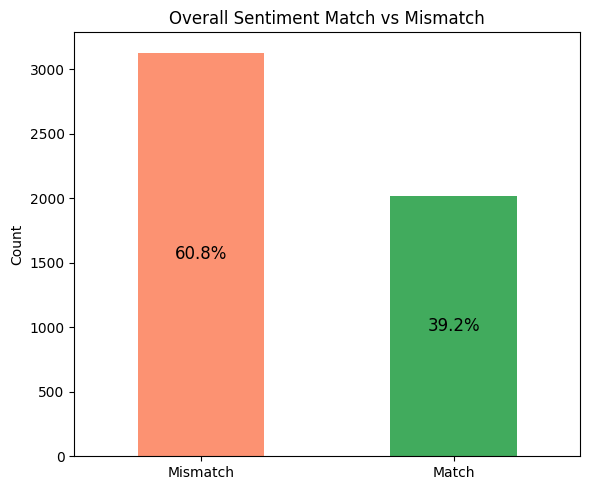

In [ ]:
# Create sentiment match column
combined_df['sentiment_match'] = combined_df['Title Sentiment'] == combined_df['Content Sentiment']

# Count matches and mismatches
counts = combined_df['sentiment_match'].value_counts()
counts.index = ['Mismatch', 'Match']  # Rename index to match labels

# Plot
ax = counts.plot(kind='bar', color=['#FC9272', '#41AB5D'], figsize=(6, 5))
plt.title('Overall Sentiment Match vs Mismatch')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate percentages
total = counts.sum()
for i, value in enumerate(counts):
    pct = value / total * 100
    ax.text(i, value / 2, f'{pct:.1f}%', ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [ ]:
mismatches_df = combined_df[combined_df['Title Sentiment'] != combined_df['Content Sentiment']]


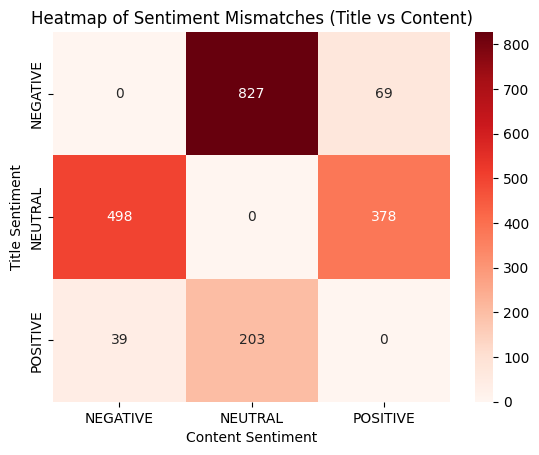

In [ ]:
heatmap_data = pd.crosstab(
    mismatches_df['Title Sentiment'],
    mismatches_df['Content Sentiment']
)

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Sentiment Mismatches (Title vs Content)')
plt.xlabel('Content Sentiment')
plt.ylabel('Title Sentiment')
plt.show()


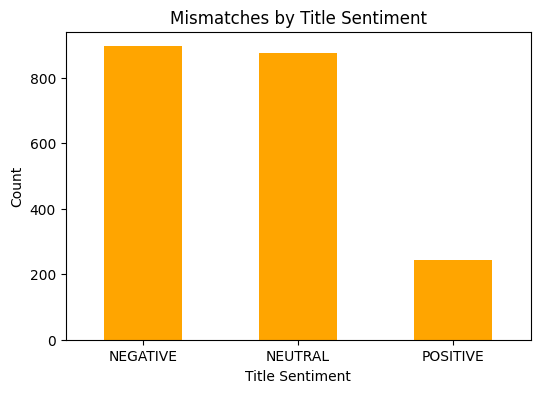

In [ ]:
mismatches_df['Title Sentiment'].value_counts().plot(
    kind='bar', color='orange', figsize=(6, 4)
)
plt.title('Mismatches by Title Sentiment')
plt.ylabel('Count')
plt.xlabel('Title Sentiment')
plt.xticks(rotation=0)
plt.show()


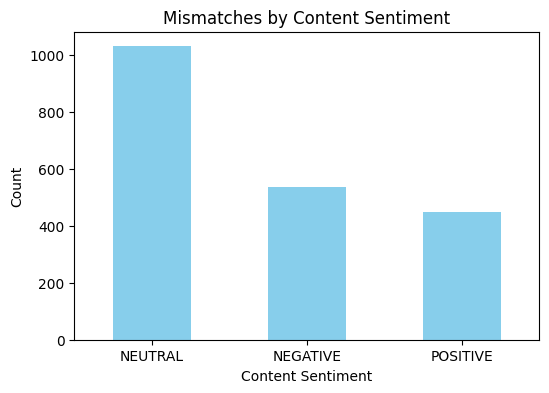

In [ ]:
mismatches_df['Content Sentiment'].value_counts().plot(
    kind='bar', color='skyblue', figsize=(6, 4)
)
plt.title('Mismatches by Content Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


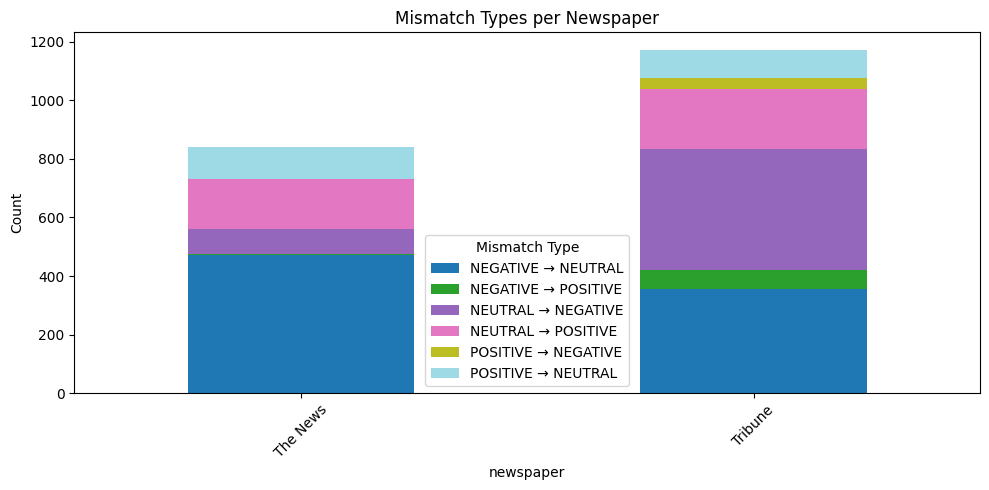

In [ ]:
mismatch_pairs = mismatches_df.copy()
mismatch_pairs['Mismatch Type'] = mismatch_pairs['Title Sentiment'] + ' → ' + mismatch_pairs['Content Sentiment']

mismatch_by_newspaper = mismatch_pairs.groupby(['newspaper', 'Mismatch Type']).size().unstack(fill_value=0)
mismatch_by_newspaper.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='tab20')
plt.title('Mismatch Types per Newspaper')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


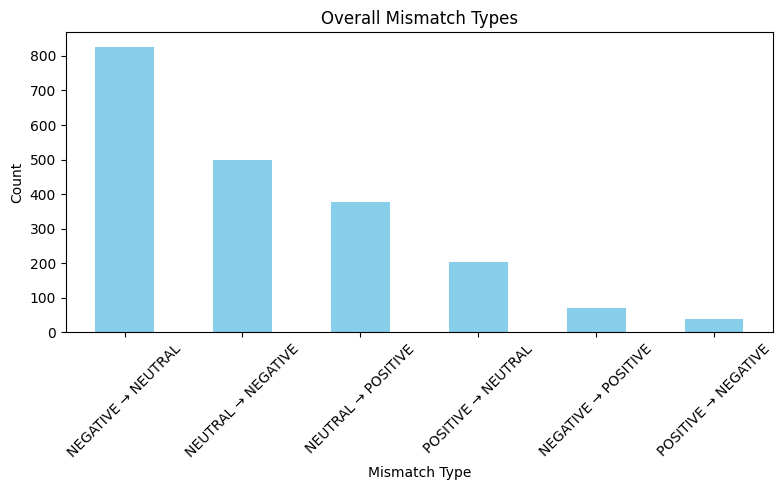

In [ ]:
mismatch_pairs = mismatches_df.copy()
mismatch_pairs['Mismatch Type'] = mismatch_pairs['Title Sentiment'] + ' → ' + mismatch_pairs['Content Sentiment']

# Group by mismatch type only (no newspaper breakdown)
mismatch_counts = mismatch_pairs['Mismatch Type'].value_counts()

# Plot
mismatch_counts.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Overall Mismatch Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Filter only mismatched rows
mismatches_df = combined_df[combined_df['Title Sentiment'] != combined_df['Content Sentiment']]

# Create a 'Mismatch Type' column
mismatches_df['Mismatch Type'] = mismatches_df['Title Sentiment'] + ' → ' + mismatches_df['Content Sentiment']


/tmp/ipython-input-29-1596436062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatches_df['Mismatch Type'] = mismatches_df['Title Sentiment'] + ' → ' + mismatches_df['Content Sentiment']


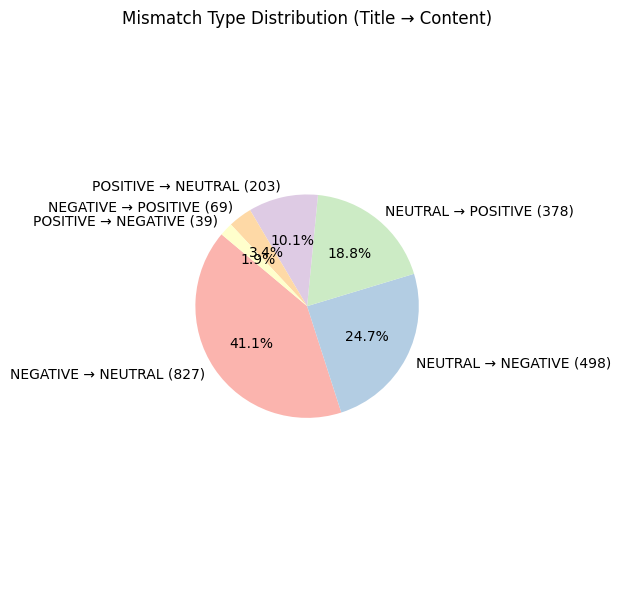

In [ ]:
mismatch_type_counts = mismatches_df['Mismatch Type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    mismatch_type_counts,
    labels=[f"{k} ({v})" for k, v in mismatch_type_counts.items()],
    autopct='%1.1f%%',
    colors=plt.cm.Pastel1.colors,
    startangle=140
)
plt.title("Mismatch Type Distribution (Title → Content)")
plt.axis('equal')
plt.tight_layout()
plt.show()


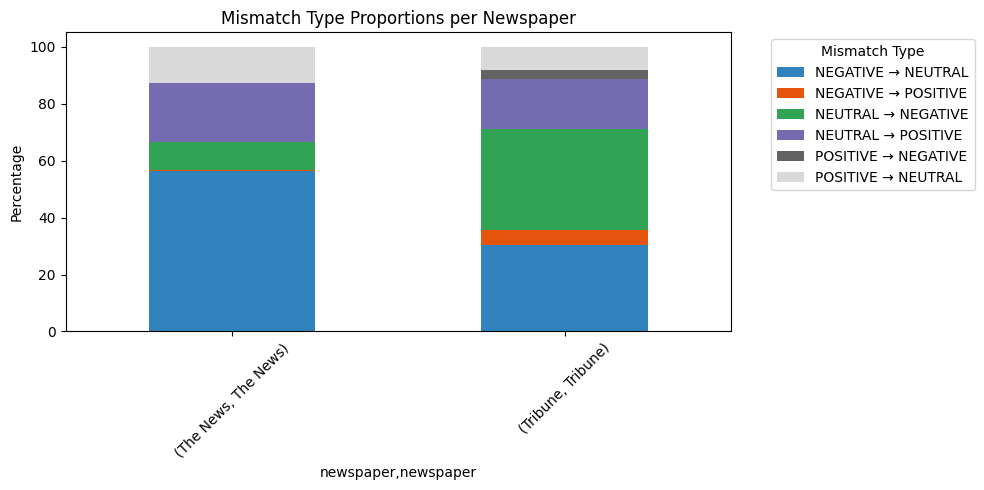

In [ ]:
normalized_mismatches = (
    mismatches_df.groupby(['newspaper', 'Mismatch Type'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .unstack(fill_value=0)
)

normalized_mismatches.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    colormap='tab20c'
)
plt.title("Mismatch Type Proportions per Newspaper")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title='Mismatch Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


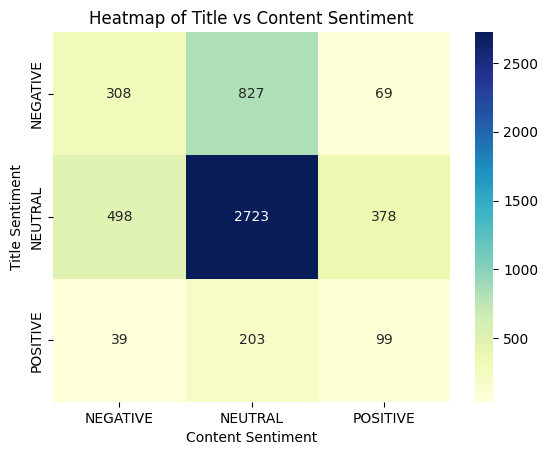

In [ ]:
heatmap_data = pd.crosstab(combined_df['Title Sentiment'], combined_df['Content Sentiment'])
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Title vs Content Sentiment')
plt.xlabel('Content Sentiment')
plt.ylabel('Title Sentiment')
plt.show()


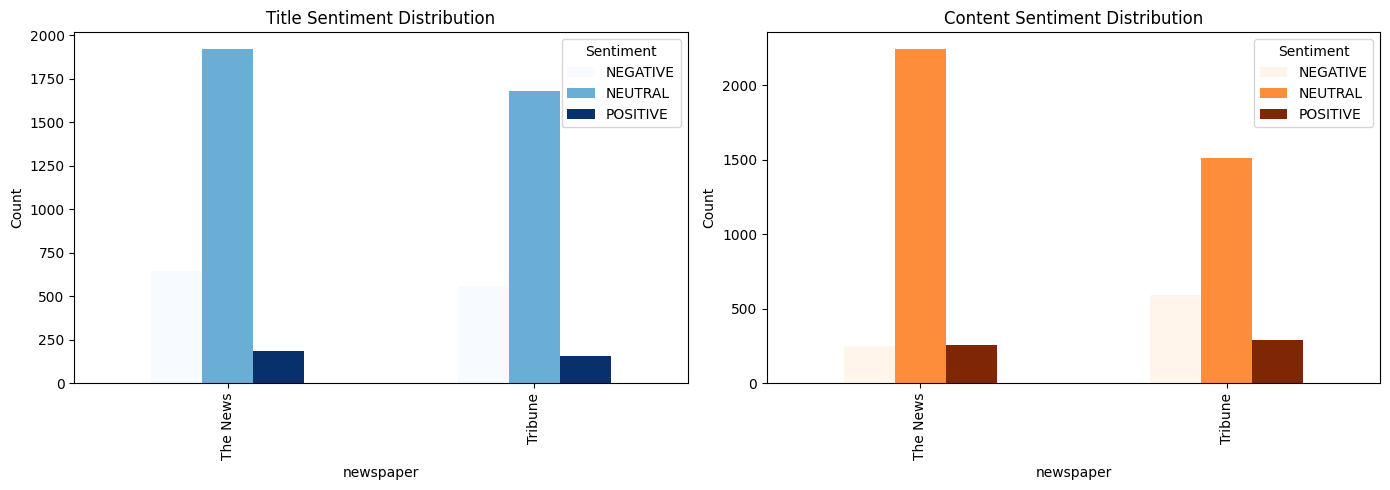

In [ ]:
title_dist = combined_df.groupby(['newspaper', 'Title Sentiment']).size().unstack(fill_value=0)
content_dist = combined_df.groupby(['newspaper', 'Content Sentiment']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
title_dist.plot(kind='bar', ax=axes[0], colormap='Blues')
axes[0].set_title('Title Sentiment Distribution')
axes[0].set_ylabel('Count')
axes[0].legend(title='Sentiment')

content_dist.plot(kind='bar', ax=axes[1], colormap='Oranges')
axes[1].set_title('Content Sentiment Distribution')
axes[1].set_ylabel('Count')
axes[1].legend(title='Sentiment')

plt.tight_layout()
plt.show()


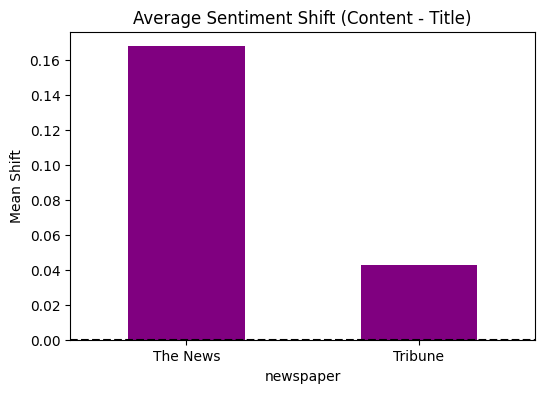

In [ ]:
sentiment_score = {'NEGATIVE': -1, 'NEUTRAL': 0, 'POSITIVE': 1}
combined_df['title_score'] = combined_df['Title Sentiment'].map(sentiment_score)
combined_df['content_score'] = combined_df['Content Sentiment'].map(sentiment_score)
combined_df['shift'] = combined_df['content_score'] - combined_df['title_score']

shift_df = combined_df.groupby('newspaper')['shift'].mean().to_frame()

shift_df.plot(kind='bar', legend=False, figsize=(6, 4), color='purple')
plt.title('Average Sentiment Shift (Content - Title)')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Mean Shift')
plt.xticks(rotation=0)
plt.show()


In [ ]:
sunburst_df = combined_df.copy()
sunburst_df['count'] = 1

fig = px.sunburst(
    sunburst_df,
    path=['newspaper', 'Title Sentiment', 'Content Sentiment'],
    values='count',
    color='Title Sentiment',
    color_discrete_map={'POSITIVE': 'green', 'NEGATIVE': 'red', 'NEUTRAL': 'blue'},
    title='Sentiment Flow: Newspaper → Title → Content'
)
fig.show()


In [ ]:
import plotly.express as px

# Prepare the data
sunburst_df = combined_df.copy()
sunburst_df['count'] = 1

# Create the sunburst chart
fig = px.sunburst(
    sunburst_df,
    path=['Title Sentiment', 'Content Sentiment'],
    values='count',
    color='Title Sentiment',
    color_discrete_map={'POSITIVE': 'green', 'NEGATIVE': 'red', 'NEUTRAL': 'blue'},
    title='Sentiment Flow: Title → Content'
)

# Update trace for better readability
fig.update_traces(
    textinfo='label+percent entry+value',
    insidetextorientation='radial',
    textfont_size=16
)

# Increase figure size
fig.update_layout(
    width=1100,
    height=800,
    margin=dict(t=80, l=0, r=0, b=0),
    title_font_size=24
)

fig.show()


In [ ]:
fig = px.treemap(
    sunburst_df,
    path=['Title Sentiment', 'Content Sentiment'],
    values='count',
    color='Title Sentiment',
    color_discrete_map={'POSITIVE': 'green', 'NEGATIVE': 'red', 'NEUTRAL': 'blue'},
    title='Sentiment Flow: Title → Content (Treemap View)'
)
fig.update_layout(
    width=1100,
    height=800,
    title_font_size=24
)
fig.show()


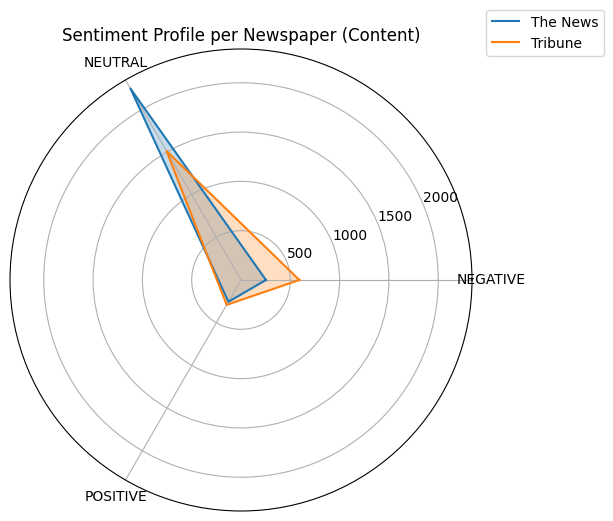

In [ ]:
radar_df = combined_df.groupby(['newspaper', 'Content Sentiment']).size().unstack().fillna(0)
categories = list(radar_df.columns)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for idx, row in radar_df.iterrows():
    values = row.tolist()
    values += values[:1]  # close the loop
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    ax.plot(angles, values, label=idx)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Sentiment Profile per Newspaper (Content)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


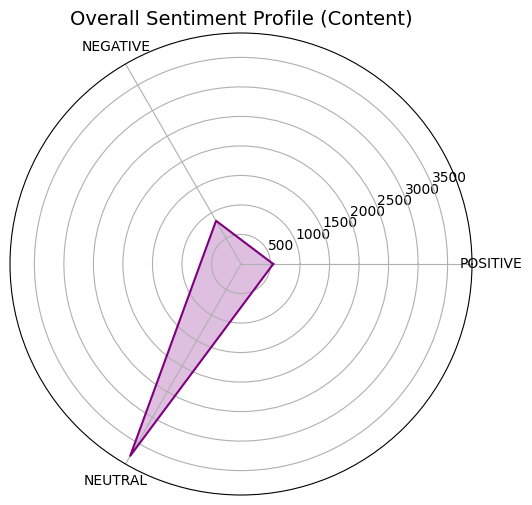

In [ ]:
# Count overall content sentiments
radar_df = combined_df['Content Sentiment'].value_counts().reindex(['POSITIVE', 'NEGATIVE', 'NEUTRAL'], fill_value=0)

# Prepare values and angles
categories = radar_df.index.tolist()
values = radar_df.tolist()
values += values[:1]  # close the loop

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, label='Overall Sentiment', color='purple')
ax.fill(angles, values, alpha=0.25, color='purple')

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Overall Sentiment Profile (Content)", size=14)
plt.show()


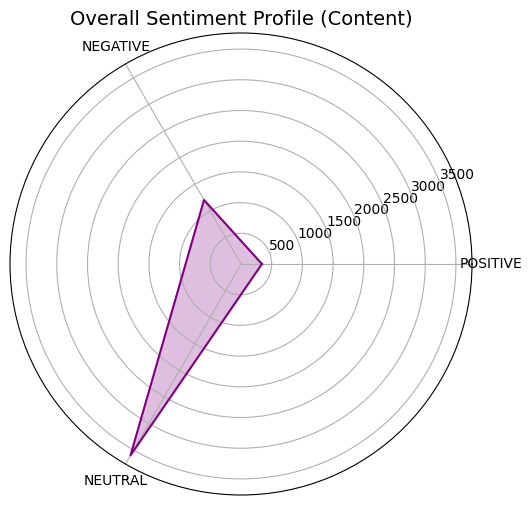

In [ ]:
# Count overall content sentiments
radar_df = combined_df['Title Sentiment'].value_counts().reindex(['POSITIVE', 'NEGATIVE', 'NEUTRAL'], fill_value=0)

# Prepare values and angles
categories = radar_df.index.tolist()
values = radar_df.tolist()
values += values[:1]  # close the loop

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, label='Overall Sentiment', color='purple')
ax.fill(angles, values, alpha=0.25, color='purple')

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Overall Sentiment Profile (Content)", size=14)
plt.show()

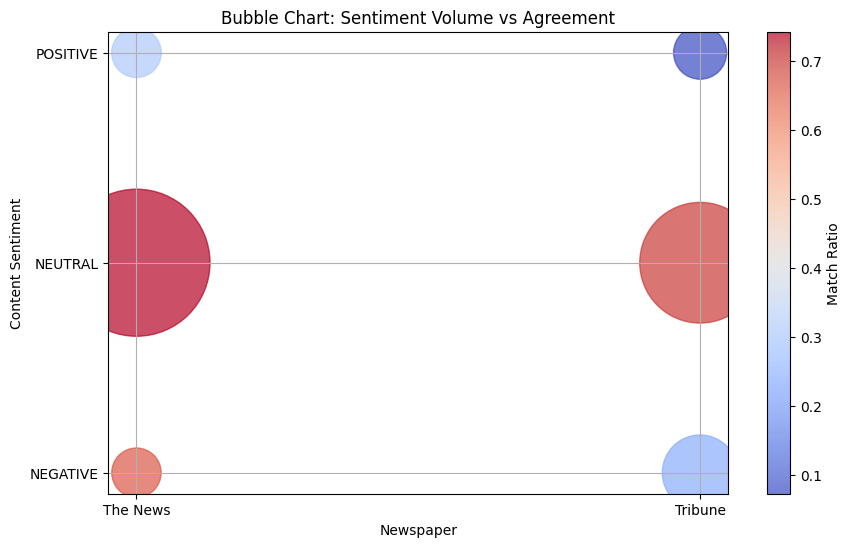

In [ ]:
grouped = combined_df.copy()
grouped['match'] = (grouped['Title Sentiment'] == grouped['Content Sentiment'])

bubble_data = grouped.groupby(['newspaper', 'Content Sentiment']).agg(
    total=('match', 'count'),
    match_ratio=('match', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    bubble_data['newspaper'],
    bubble_data['Content Sentiment'],
    s=bubble_data['total'] * 5,  # bubble size
    c=bubble_data['match_ratio'],  # color by match %
    cmap='coolwarm',
    alpha=0.7
)
plt.colorbar(scatter, label='Match Ratio')
plt.title('Bubble Chart: Sentiment Volume vs Agreement')
plt.xlabel('Newspaper')
plt.ylabel('Content Sentiment')
plt.grid(True)
plt.show()
